In [13]:
from langgraph.graph import StateGraph
from langgraph.constants import START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace

In [14]:
load_dotenv()

True

In [15]:
llm = HuggingFaceEndpoint(
    repo_id="mistralai/Mistral-7B-Instruct-v0.2",
    task="text-generation"
)

model = ChatHuggingFace(llm=llm)

In [16]:
# define state
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [17]:
def create_outline(state: BlogState) -> BlogState:
    title = state["title"]
    prompt = f"Generate an outline for a blog on the topic - {title}"
    outline = model.invoke(prompt).content
    state["outline"] = outline
    return state

def create_blog(state: BlogState) -> BlogState:
    outline = state["outline"]
    title = state["title"]
    prompt = f"Write a detailed blog on title - {title} using the following outline: {outline}"
    content = model.invoke(prompt).content
    state["content"] = content
    return state



In [18]:
# define graph
graph = StateGraph(BlogState)

# add nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)

# add edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)

# compile graph
workflow = graph.compile()

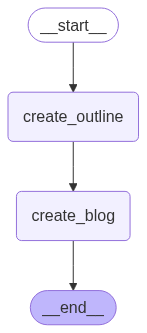

In [19]:
# visualize graph
graph.compile()

In [20]:
output = workflow.invoke({"title": "Benefits of Threading"})

In [22]:
print(output["content"])

 Title: Unraveling the Benefits of Threading: A Precise, Effective, and Gentle Hair RemovalMethod

I. Introduction
Threading is an ancient hair removal technique that has been popular in various parts of the world, especially in Asia and the Middle East, for centuries.Threading involves the use of a thin cotton thread that is twisted and rolled over the skin to pluck out hair from the root. In recent times, this technique has gained significant popularity in the western world, particularly as a method for shaping brows and removing unwanted facial hair.

The importance of facial hair grooming cannot be overemphasized. A well-groomed face is a reflection of good personal hygiene and can significantly boost your confidence.Threading offers a precise, effective, and gentle alternative to more conventional methods of hair removal, such as waxing, shaving, and tweezing. Let's take a closer look at the various benefits of threading.

II. Benefits of Threading

1. Precision and fine details
T